In [1]:
# Project 3: House Price Prediction (Regression) 🏠
# Project Objective: To build a regression model that accurately predicts the sale price of houses based on a large number of features. This project will cover the complete machine learning workflow, from deep EDA to advanced preprocessing, feature engineering, model training, and evaluation.

In [2]:
##STEP 1 : IMPORT ALL THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
import os 

In [3]:
!pip install xgboost

In [4]:
import xgboost as xgb 

In [5]:
##STEP 2 : SETTING UP KAGGLE 
#downloaded the Kaggle File directly and extracted the zip file in the folder

In [6]:
##STEP 3 : SETTING UP THE DATAFRAMES
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_count = train_df.shape
test_count = test_df.shape
print("Training Dataset Dimensions: ",train_count)
print("Testing Dataset Dimensions: ",test_count)

Training Dataset Dimensions:  (1460, 81)
Testing Dataset Dimensions:  (1459, 80)


In [7]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
##index can be the ids here in the datasets
train_df.set_index("Id",inplace=True)
test_df.set_index("Id",inplace=True)

In [10]:
train_count2 = train_df.shape
test_count2 = test_df.shape
print("Training Dataset Dimensions: ",train_count2)
print("Testing Dataset Dimensions: ",test_count2)

Training Dataset Dimensions:  (1460, 80)
Testing Dataset Dimensions:  (1459, 79)


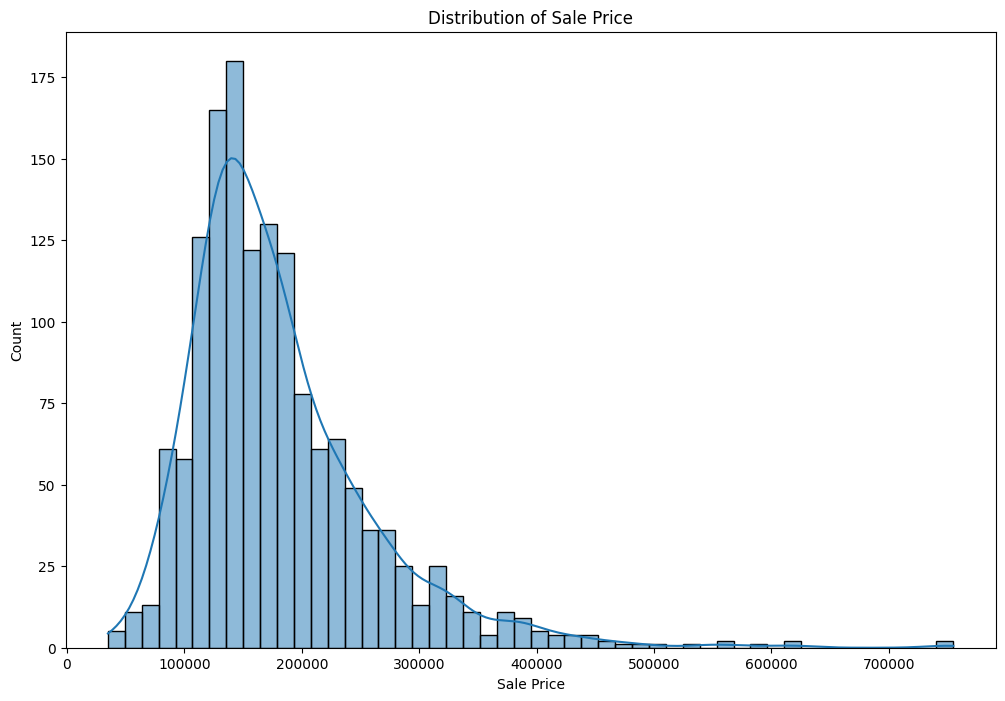

Skewness of Sale Price: 1.8828757597682129


In [17]:
##STEP 4 : IMPLEMENTING EXPLORATORY DATA ANALYSIS (EDA)
plt.figure(figsize=(12,8))
sns.histplot(data=train_df,x='SalePrice',kde=True,bins=50).set_title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.show()

skew_sales = train_df['SalePrice'].skew()
print(f"Skewness of Sale Price:",skew_sales)
##How symmetric the data is? Whether the data lean towards left or right? 

In [20]:
#OBSERVATION : Distribution is highly skewed which affects the model especially the linear model hence we need to transform it before developing the models. To fix we can apply lof transformation np.log1p

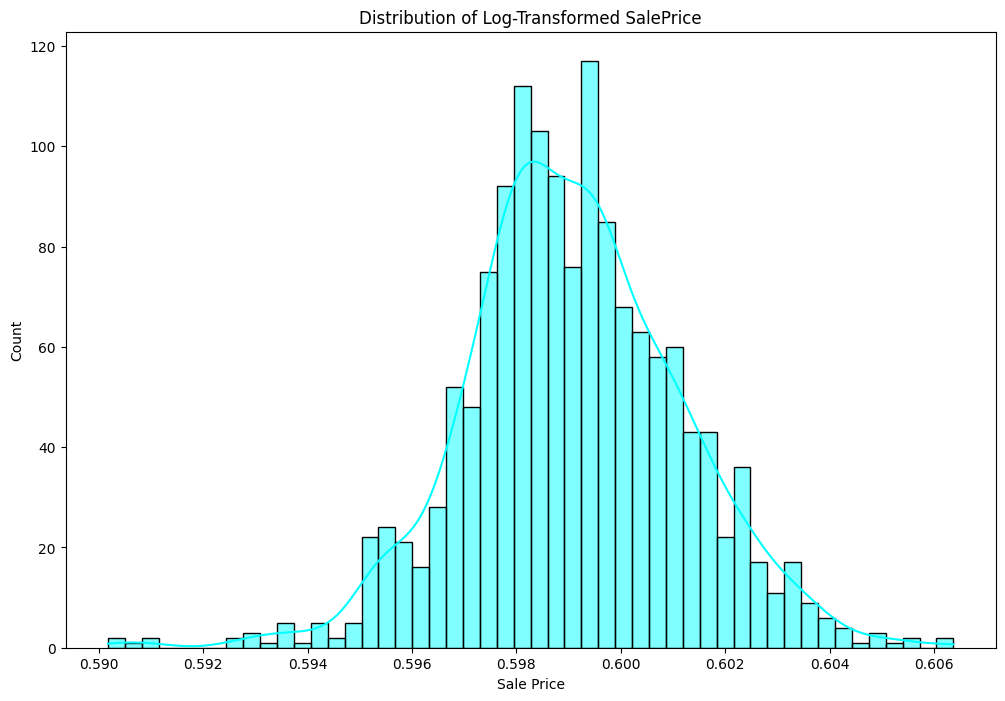

Skewness after log transformation: -0.07241128896267322


In [25]:
train_df['SalePrice'] = np.loglp(train_df['SalePrice'])

plt.figure(figsize=(12,8))
sns.histplot(x='SalePrice',data=train_df,kde=True,bins=50,color='cyan').set_title('Distribution of Log-Transformed SalePrice')
plt.xlabel("Sale Price")
plt.show()

train_transform_log = train_df['SalePrice'].skew()
print(f"Skewness after Log Transformation:",train_transform_log)